Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/exercises/exercise06/exercise06.ipynb)

# Exercise 6

## Problem

In class this week, we saw how to access real-time data about Capital Bikeshare from the internet using their API. We also dealt with the challenge of wrangling those data. We needed to parse a JSON file into a table, and we considered how we might retrieve, store, and combine many JSONs in order to understand how bike availability changed over time.

These real-time data can help us answer questions about how well Captial Bikeshare is being utilized.

See if you can use data from the API (I have already stored and combined it--see below) answer these questions:
- How many bikes were available within the system during each hour over a 24 hour period?
    - Can you graph this over time?
    - Which hour of the day were bikes most available? Least available?

**Bonus:** Can you write a function to estimate how many bikes are <ins>currently being used</ins>, whenever you call the function? This will require loading real-time data from the API and comparing it to stored data.

## Data

I wrote a script, which you can see [here](https://github.com/ncsg/ursp688y_sp2024/blob/main/demos/demo06/cabi_data/get_cabi_free_bikes.py), to retrieve and store JSON data from the `free_bike_status` table in [Capital Bikeshare's](https://capitalbikeshare.com/system-data) GBFS feed every 5 minutes. I ran this script on my computer for a bit more than 24 hours. ([Here's a tutorial](https://realpython.com/run-python-scripts/) on running scripts on the command line, if you're curious.) All of those JSONS are available for you to use. They're stored at [`ursp688y_sp2024/demos/demo06/cabi_data`](https://github.com/ncsg/ursp688y_sp2024/tree/main/demos/demo06/cabi_data).

## Building Off of the Demo

The in-class demo gave us a starting point for how to access real-time JSON data from the API, load saved JSON data, and parse JSON data into a DataFrame.

I have copied what we did in class below and added onto it to develop a single tidy dataframe with records from all the saved JSONs, plus timestamps. This should be all the data you need for the questions above (except the bonus).

See if you can follow my code, then build onto it.

As usual, please wrap the code for your solution in a function, and put that function into a module (you can add to my module, or make a new one if you prefer). Then load your main function from the module and call it in the notebook to demonstrate your solution.


# Setup

In [5]:
# Import packages
import os
import json
import requests
import pandas as pd

In [6]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Set the working directory
# You will need to change this to your own folder on Google Drive
os.chdir('/content/drive/MyDrive/exercise06_anderson')

In [8]:
# Import module
import exercise06

# Request current data from the API

In [9]:
# Making a get request
response = requests.get('https://gbfs.lyft.com/gbfs/1.1/dca-cabi/en/free_bike_status.json')

# Get JSON content
data = response.json()

# Inspect the contents
data.keys()

dict_keys(['data', 'last_updated', 'ttl', 'version'])

In [10]:
# Make a dataframe out of data for available bikes
df = pd.DataFrame(data['data']['bikes'])

df.head()

,name,rental_uris,is_reserved,is_disabled,bike_id,lon,fusion_lon,type,fusion_lat,lat
0,222-581,{'android': 'https://dc.lft.to/lastmile_qr_sca...,0,0,a0aa065f6fd74e7978b513d8cdd64cf1,-76.998796,0.0,electric_bike,0.0,38.918918
1,201-455,{'android': 'https://dc.lft.to/lastmile_qr_sca...,0,0,1be60cbace8b7fb6f5113f3689d45679,-77.147763,0.0,electric_bike,0.0,38.863847
2,564-686,{'android': 'https://dc.lft.to/lastmile_qr_sca...,0,0,fb19f8b9cd0eb6c7c5c2019b2effe94d,-77.021102,0.0,electric_bike,0.0,38.946349
3,623-376,{'android': 'https://dc.lft.to/lastmile_qr_sca...,0,0,6727235431abec1be31966c49da709d3,-77.010549,0.0,electric_bike,0.0,38.877639
4,600-338,{'android': 'https://dc.lft.to/lastmile_qr_sca...,0,0,8ddac87deb216072596c9a7d48226c06,-76.996298,0.0,electric_bike,0.0,38.927432


# Load JSON data saved in a file

In [11]:
# open a single stored json
with open('cabi_data/cabi_bike_status_2024-03-03_13-11-54.json') as json_data: # Notice how I added 'cabi_data/' to the front of the path to get into that subdirectory where the jsons are stored?
    data = json.load(json_data)
    json_data.close()

In [12]:
# see how the data are stored
type(data)

dict

In [13]:
# see what keys are available
data.keys()

dict_keys(['data', 'last_updated', 'ttl', 'version'])

In [14]:
# drill into the records for each bike
records = data['data']['bikes']

# convert to a dataframe
df = pd.DataFrame(records)

# drop a column that we won't use, just to keep things clean
df = df.drop(columns=['rental_uris'])

In [15]:
df.head()

,is_reserved,fusion_lon,fusion_lat,lat,type,is_disabled,bike_id,name,lon
0,0,0.0,0.0,38.887458,electric_bike,0,d94788433d337e4186fb431076b52e91,320-065,-77.025747
1,0,0.0,0.0,38.905328,electric_bike,0,cc49246f85fdc23a6a13b3402ab52b37,222-581,-77.058526
2,0,0.0,0.0,38.908954,electric_bike,0,75c5df17a8236707a7948f509a5ab929,228-812,-77.043055
3,0,0.0,0.0,38.955421,electric_bike,0,4e51a79c1e03962064762ff16013b1a8,570-760,-76.940135
4,0,0.0,0.0,38.892292,electric_bike,0,5983a1b66f086f7905d8aa701fa7b5df,268-224,-77.042912


# Iteratively load all the JSON files and combine them into a single dataframe

Except for the impact statements above, this is probably the only part of the code you'll need to keep. This function wraps all the loading steps. Feel free to delete the cells above if you're not using them.

In [16]:
df = exercise06.load_and_combine_free_bike_status_jsons_as_df('cabi_data')

df.head(100)

,fusion_lon,type,lon,is_disabled,name,lat,is_reserved,fusion_lat,bike_id,timestamp
0,0.0,electric_bike,-77.025759,0,320-065,38.887438,0,0.0,7c20ce794669aa5287d31d17fa61b520,2024-03-04 13:36:43-05:00
1,0.0,electric_bike,-77.047122,0,228-812,38.899582,0,0.0,10d89bc4faff39cde9bd69ff99177dd3,2024-03-04 13:36:43-05:00
2,0.0,electric_bike,-76.940148,0,570-760,38.955471,0,0.0,ab78d4e7a126f0213e80ff2b1ff8fd8a,2024-03-04 13:36:43-05:00
3,0.0,electric_bike,-77.046882,0,329-768,38.898290,0,0.0,fb11864e50d7150addb6c8002e6196b5,2024-03-04 13:36:43-05:00
4,0.0,electric_bike,-77.147699,0,201-455,38.863886,0,0.0,b60392ab0f81c253fb5a2e01030017c6,2024-03-04 13:36:43-05:00
...,...,...,...,...,...,...,...,...,...,...
95,0.0,electric_bike,-77.100063,0,716-441,38.979349,0,0.0,d79b5c279d62d0384989e83222853076,2024-03-04 13:36:43-05:00
96,0.0,electric_bike,-77.162401,0,163-775,38.886691,0,0.0,1c730ae5845f44670cf807a678541065,2024-03-04 13:36:43-05:00
97,0.0,electric_bike,-77.070950,0,577-499,38.843246,0,0.0,211c0c74831e29feeda4f7120e882c2a,2024-03-04 13:36:43-05:00
98,0.0,electric_bike,-76.954027,0,294-542,38.921155,0,0.0,cc1116fb1d4f875a04abb4dc47c012b4,2024-03-04 13:36:43-05:00


This is where you take over. Can you use this dataframe to answer the question(s) above?

API Documentation:https://developers.google.com/micromobility/reference/gbfs-definitions

In [26]:
#How many bikes were available within the system during each hour over a 24 hour period?
available_bikes_by_hour = exercise06.available_bikes_by_hour(df)
print(available_bikes_by_hour)

timestamp
2024-03-03 15:11:08-05:00    965
2024-03-03 16:11:08-05:00    987
2024-03-03 17:11:08-05:00    977
2024-03-03 18:11:08-05:00    965
2024-03-03 19:11:08-05:00    940
2024-03-03 20:11:08-05:00    942
2024-03-03 21:11:08-05:00    934
2024-03-03 22:11:08-05:00    957
2024-03-03 23:11:08-05:00    947
2024-03-04 00:11:08-05:00    944
2024-03-04 01:11:08-05:00    938
2024-03-04 02:11:08-05:00    937
2024-03-04 03:11:08-05:00    943
2024-03-04 04:11:08-05:00    945
2024-03-04 05:11:08-05:00    937
2024-03-04 06:11:08-05:00    942
2024-03-04 07:11:08-05:00    942
2024-03-04 08:11:08-05:00    973
2024-03-04 09:11:08-05:00    953
2024-03-04 10:11:08-05:00    941
2024-03-04 11:11:08-05:00    935
2024-03-04 12:11:08-05:00    963
2024-03-04 13:11:08-05:00    962
2024-03-04 14:11:08-05:00    975
Freq: H, dtype: int64


<Axes: title={'center': 'Bikes Available Within a 24 Hour Period'}, xlabel='Date & Hour', ylabel='Available Bikes'>

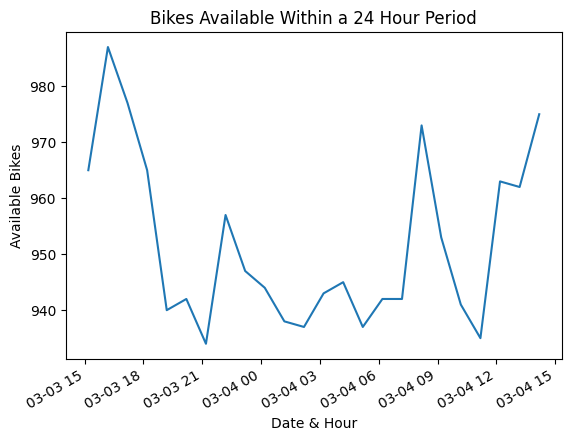

In [28]:
#Can you graph this over time?
available_bikes_by_hour.plot(title='Bikes Available Within a 24 Hour Period', xlabel='Date & Hour',ylabel='Available Bikes')

In [19]:
#Which hour of the day were bikes most available? Least available?
print(f"Bikes were most available on {(available_bikes_by_hour.idxmax())} and least available on {(available_bikes_by_hour.idxmin())}.")


Bikes were most available on 2024-03-03 16:11:08-05:00 and least available on 2024-03-03 21:11:08-05:00.
